# Events data

## Import libraries and styles for data visualization

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
import itertools
from sklearn.feature_extraction.text import CountVectorizer

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

## High-level descriptive information

Load the dataset:

In [2]:
df = pd.read_csv('../data/vicende.csv', delimiter='|', encoding='ISO-8859-1')

Drop `DataOraModifica` column:

In [3]:
df = df.drop('DataOraModifica', axis=1)

Look at the first five and the last five rows in the dataset:

In [4]:
df.head()

,IdVicenda,IdVeteroDb,IdRifVeteroDb,IdBibliografia,IdBibliografiaProvv,IdCastello,Datazione,DataNA,DataNM,DataNG,...,VolumeRiferimento,PaginaRiferimento,NumeroDocumento,Denominazione,Appartenenza,TitoloPossesso,StruttureIndicate,Pieve,Parrocchia,DistrettoCivile
0,5319,Faenza Oriolo 1,FA1,8.0,2082.0,258,1510 mar. 10,1510,3.0,10.0,...,NaN,69,NaN,NaN,Stato della Chiesa,NaN,NaN,NaN,NaN,NaN
1,5320,Faenza Oriolo 1,FA1,8.0,2082.0,258,1556 dic. 26,1556,12.0,26.0,...,NaN,71,NaN,NaN,Stato della Chiesa,NaN,NaN,NaN,NaN,NaN
2,5321,Faenza Oriolo 1,FA1,8.0,2082.0,258,1690 giu. 30,1690,6.0,30.0,...,NaN,73,NaN,NaN,Stato della Chiesa,NaN,NaN,NaN,NaN,NaN
3,5322,Faenza Oriolo 1,FA1,8.0,2082.0,258,1771,1771,1.0,1.0,...,NaN,73,NaN,NaN,famiglia Caldesi,enfiteusi,NaN,NaN,NaN,NaN
4,5323,Faenza Oriolo 1,FA1,8.0,2082.0,258,1824,1824,1.0,1.0,...,NaN,73,NaN,NaN,famiglia Caldesi,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,IdVicenda,IdVeteroDb,IdRifVeteroDb,IdBibliografia,IdBibliografiaProvv,IdCastello,Datazione,DataNA,DataNM,DataNG,...,VolumeRiferimento,PaginaRiferimento,NumeroDocumento,Denominazione,Appartenenza,TitoloPossesso,StruttureIndicate,Pieve,Parrocchia,DistrettoCivile
38467,69607,NaN,NaN,1190.0,NaN,4059,1316,1316,7.0,30.0,...,2,19r-20v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38468,69608,NaN,NaN,1190.0,NaN,4059,1316,1316,8.0,2.0,...,2,21r-22v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38469,69609,NaN,NaN,1190.0,NaN,4059,1316,1316,8.0,5.0,...,2,23r-26v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38470,69610,NaN,NaN,1190.0,NaN,4059,1316,1316,8.0,8.0,...,2,27r-31v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38471,69611,NaN,NaN,1190.0,NaN,4059,1316,1316,8.0,10.0,...,2,32r-33v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Get general information about the dataset, including the number of rows and columns, the columns' headings and datatypes:

In [6]:
df.shape

(38472, 22)

In [7]:
df.columns

Index(['IdVicenda', 'IdVeteroDb', 'IdRifVeteroDb', 'IdBibliografia',
       'IdBibliografiaProvv', 'IdCastello', 'Datazione', 'DataNA', 'DataNM',
       'DataNG', 'Avvenimento', 'Altro', 'VolumeRiferimento',
       'PaginaRiferimento', 'NumeroDocumento', 'Denominazione', 'Appartenenza',
       'TitoloPossesso', 'StruttureIndicate', 'Pieve', 'Parrocchia',
       'DistrettoCivile'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IdVicenda            38472 non-null  int64  
 1   IdVeteroDb           38353 non-null  object 
 2   IdRifVeteroDb        38353 non-null  object 
 3   IdBibliografia       38462 non-null  float64
 4   IdBibliografiaProvv  38353 non-null  float64
 5   IdCastello           38472 non-null  int64  
 6   Datazione            38244 non-null  object 
 7   DataNA               38472 non-null  int64  
 8   DataNM               38159 non-null  float64
 9   DataNG               38159 non-null  float64
 10  Avvenimento          38343 non-null  object 
 11  Altro                8633 non-null   object 
 12  VolumeRiferimento    13890 non-null  object 
 13  PaginaRiferimento    37766 non-null  object 
 14  NumeroDocumento      3571 non-null   object 
 15  Denominazione        20105 non-null 

### Duplicated data

Check for duplicated values:

In [9]:
print(df.duplicated().sum())

0


In [10]:
df.nunique()

IdVicenda              38472
IdVeteroDb             14196
IdRifVeteroDb             14
IdBibliografia          1153
IdBibliografiaProvv    14221
IdCastello              1942
Datazione               7258
DataNA                  1186
DataNM                    18
DataNG                    34
Avvenimento            35366
Altro                   5899
VolumeRiferimento        124
PaginaRiferimento       2011
NumeroDocumento         1158
Denominazione           6744
Appartenenza            3696
TitoloPossesso           388
StruttureIndicate       1870
Pieve                    275
Parrocchia               137
DistrettoCivile          163
dtype: int64

### Data sparsity

Check NULL data:

In [11]:
df.isnull().sum()

IdVicenda                  0
IdVeteroDb               119
IdRifVeteroDb            119
IdBibliografia            10
IdBibliografiaProvv      119
IdCastello                 0
Datazione                228
DataNA                     0
DataNM                   313
DataNG                   313
Avvenimento              129
Altro                  29839
VolumeRiferimento      24582
PaginaRiferimento        706
NumeroDocumento        34901
Denominazione          18367
Appartenenza           18485
TitoloPossesso         31385
StruttureIndicate      28168
Pieve                  37457
Parrocchia             38116
DistrettoCivile        37463
dtype: int64

<Axes: >

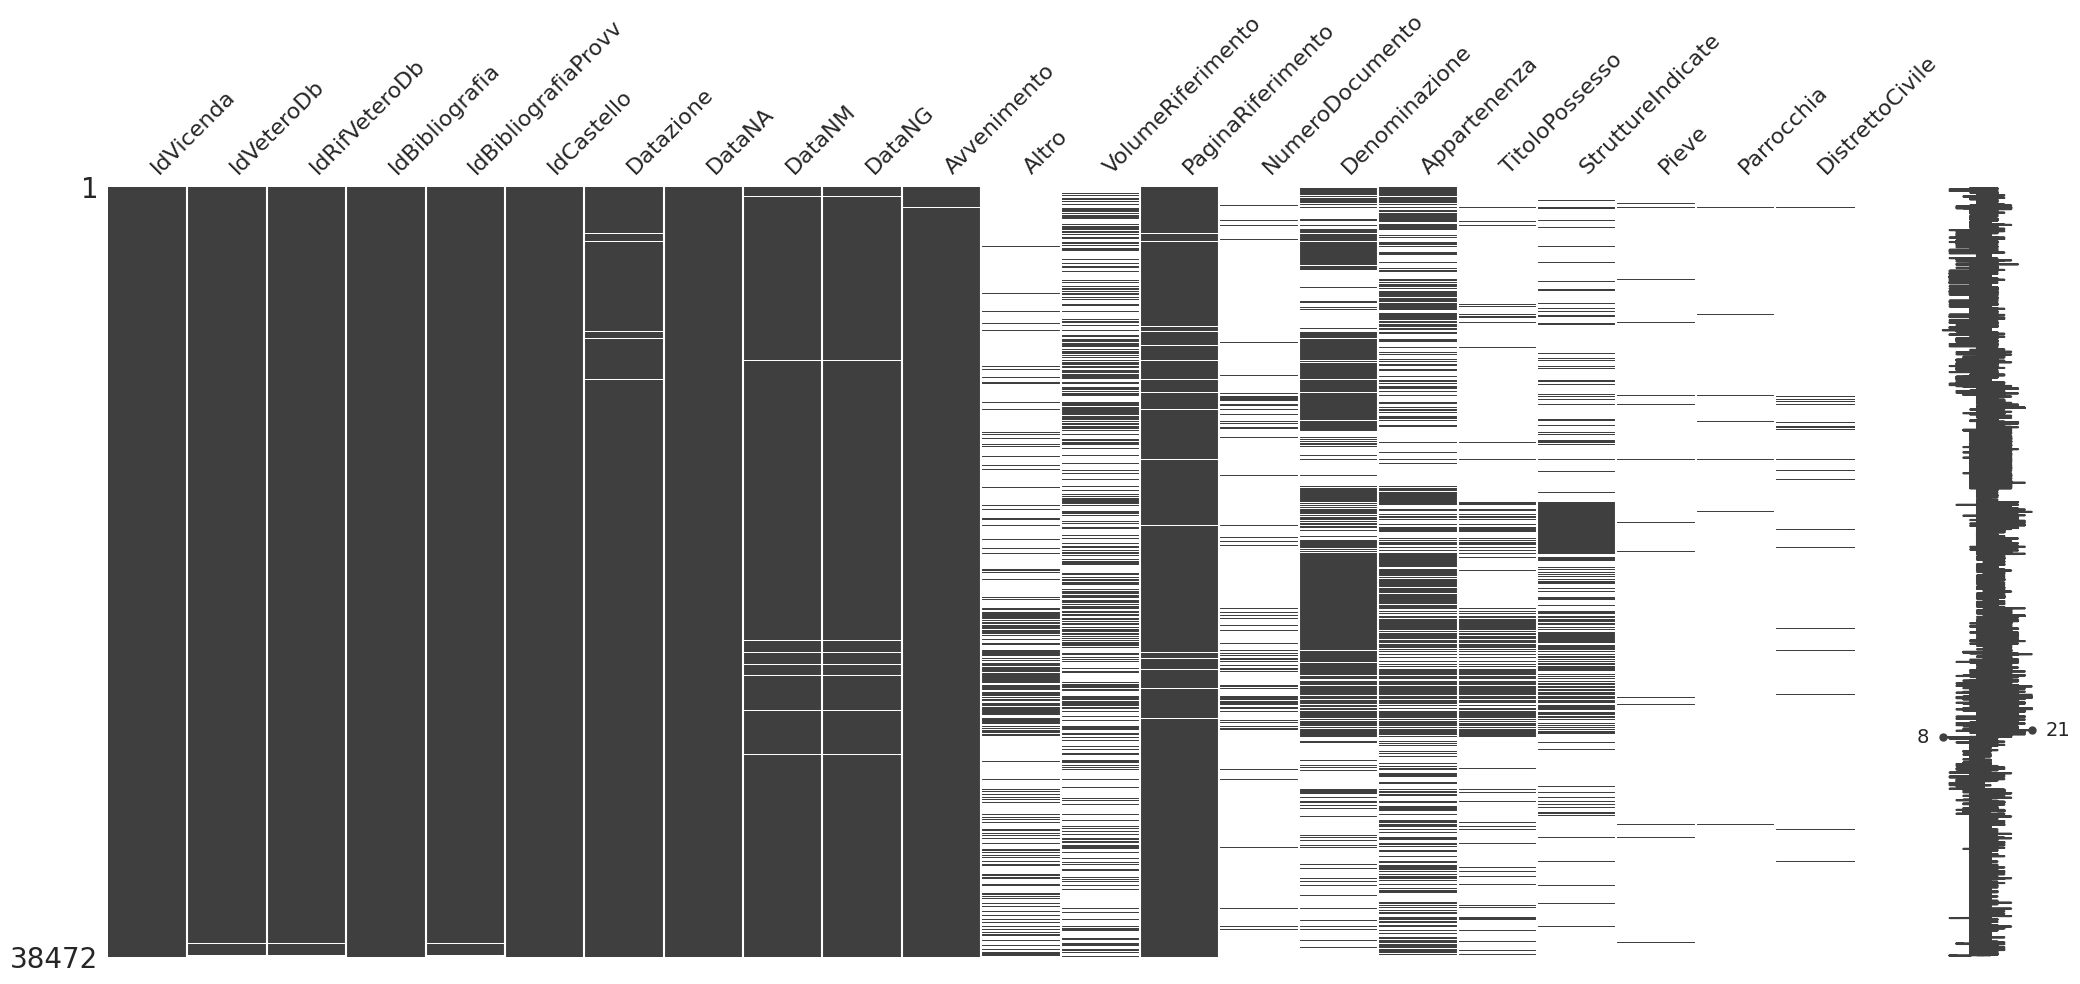

In [12]:
msno.matrix(df)

<Axes: >

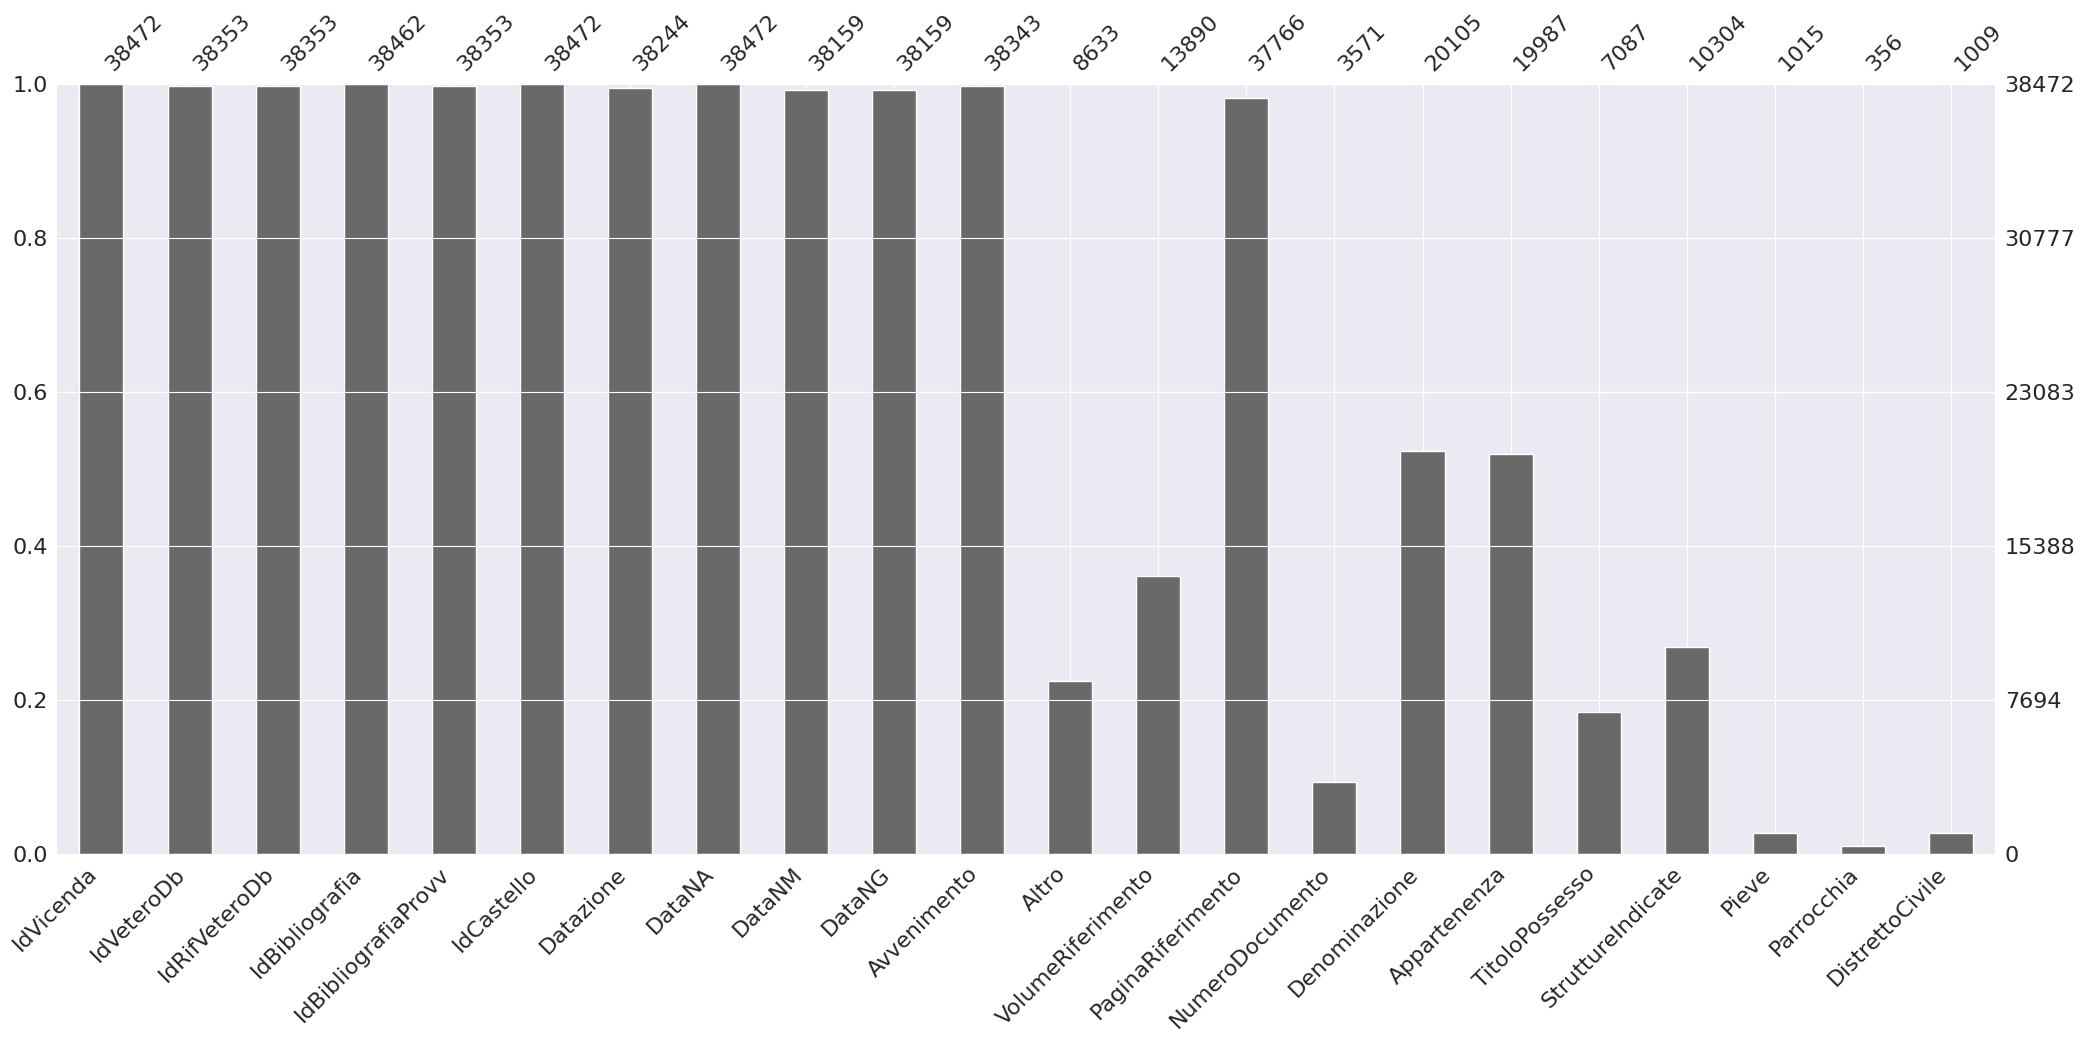

In [13]:
msno.bar(df)

## Detailed analysis per column

### `Datazione`

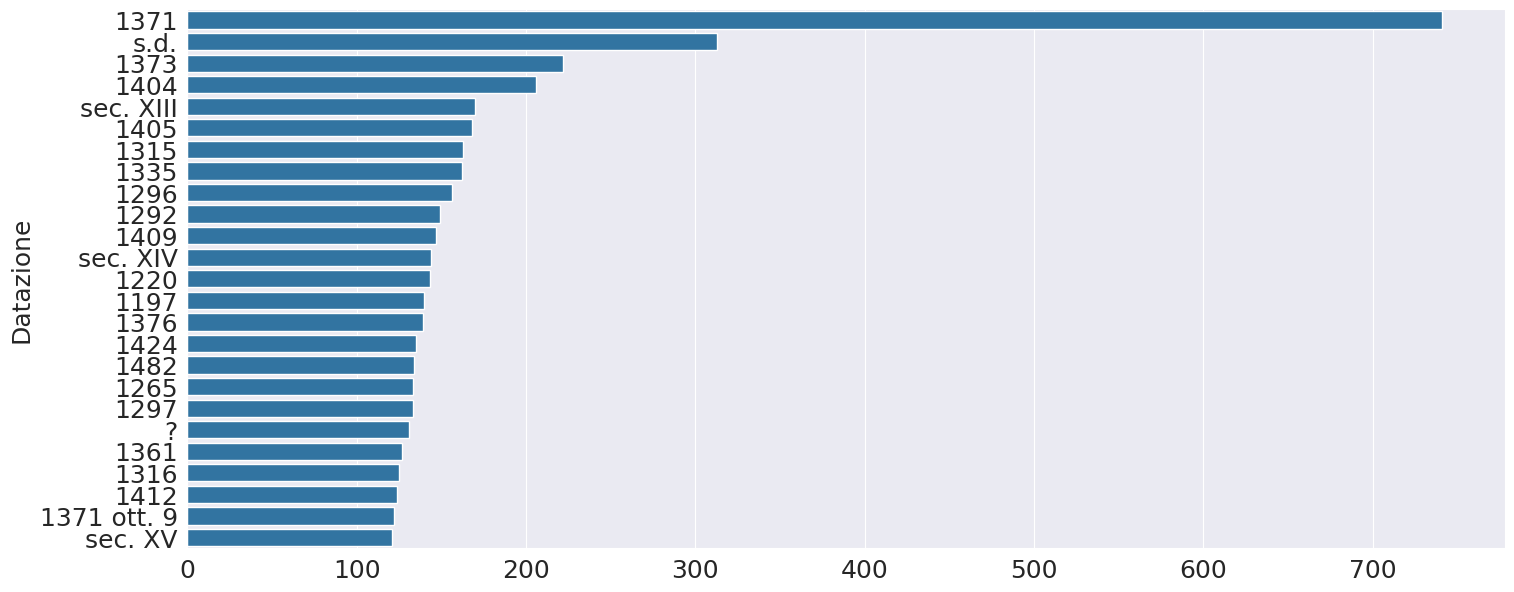

In [14]:
dateliteral_counts = df['Datazione'].value_counts().head(25)
sns.barplot(y=dateliteral_counts.index, x=dateliteral_counts.values)
plt.show()

### `DataNA`, `DataNM`, `DataNG`

It is possible to extract machine-readable dates by concatenating the calues in these three columns.

First, deal with the NULL values. In `DataNM` and `DataNG` they are represented by the canonical `NaN`; in `DataNA`, however, they are represented by the value `9999`. 

Normalize the NULL values in `DataNA`:

In [15]:
nan_values = df[df['DataNM'].isna()]
nan_values

,IdVicenda,IdVeteroDb,IdRifVeteroDb,IdBibliografia,IdBibliografiaProvv,IdCastello,Datazione,DataNA,DataNM,DataNG,...,VolumeRiferimento,PaginaRiferimento,NumeroDocumento,Denominazione,Appartenenza,TitoloPossesso,StruttureIndicate,Pieve,Parrocchia,DistrettoCivile
474,32504,Polinago Casale 3,MO1,705.0,11705.0,2471,s.d.,9999,NaN,NaN,...,NaN,282,NaN,Castellum Casalis,NaN,NaN,NaN,NaN,NaN,NaN
495,32176,Pavullo nel Frignano Montecuccolo 4,MO1,990.0,11620.0,2447,s.d.,9999,NaN,NaN,...,II,90,NaN,Montecuccolo,NaN,NaN,NaN,NaN,NaN,NaN
920,6108,Argenta Argenta 2,FE1,108.0,2409.0,318,s.d.,9999,NaN,NaN,...,NaN,NaN,NaN,NaN,esarcato,NaN,NaN,San Giorgio,NaN,NaN
966,6154,Argenta Argenta 8,FE1,31.0,2415.0,318,s.d.,9999,NaN,NaN,...,NaN,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
982,6170,Bondeno Bondeno 1,FE1,121.0,2427.0,323,s.d.,9999,NaN,NaN,...,NaN,171,NaN,NaN,NaN,NaN,castello,Bondeno,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31187,54991,Vigolzone Vigolzone 8e,PC1,447.0,21320.0,3691,s.d.,9999,NaN,NaN,...,NaN,161,NaN,Castello Vincovio (?),NaN,NaN,NaN,NaN,NaN,NaN
31221,55025,Zerba Zerba 1c,PC1,435.0,21326.0,3693,s.d.,9999,NaN,NaN,...,NaN,1384,NaN,NaN,Pinotto Pinotti,NaN,NaN,NaN,NaN,NaN
31312,55116,Ziano Costola di Vicomarino 1a,PC1,427.0,21353.0,3699,s.d.,9999,NaN,NaN,...,NaN,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31313,55117,Ziano Luzzano 1a,PC1,427.0,21354.0,3700,s.d.,9999,NaN,NaN,...,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df['DataNA'] = df['DataNA'].replace(9999, np.nan)

Then, create a new DataFrame containing only existing dates:

In [17]:
datan_df = df[['DataNA', 'DataNM', 'DataNG']]
datan_df = datan_df[datan_df['DataNA'].notna()]
datan_df

,DataNA,DataNM,DataNG
0,1510.0,3.0,10.0
1,1556.0,12.0,26.0
2,1690.0,6.0,30.0
3,1771.0,1.0,1.0
4,1824.0,1.0,1.0
...,...,...,...
38467,1316.0,7.0,30.0
38468,1316.0,8.0,2.0
38469,1316.0,8.0,5.0
38470,1316.0,8.0,8.0


Since they are treated as float by default, it is necessary to convert them into integers:

In [18]:
datan_df['DataNA'] = datan_df['DataNA'].astype(int)
datan_df['DataNM'] = datan_df['DataNM'].astype(int)
datan_df['DataNG'] = datan_df['DataNG'].astype(int)

Then, it is possible to concatenate them into a new column `DataN`:

In [19]:
datan_df['DataN'] = datan_df['DataNA'].astype(str) + '-' + datan_df['DataNM'].astype(str) + '-' + datan_df['DataNG'].astype(str)

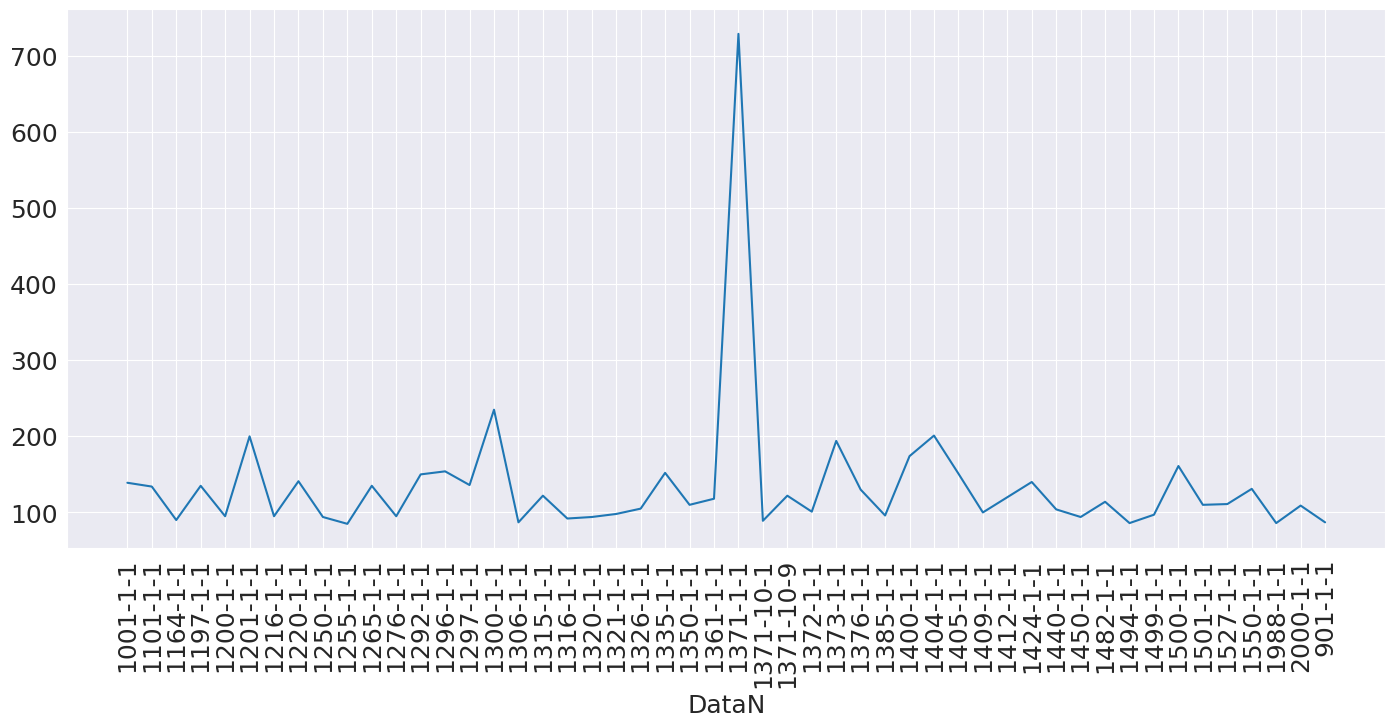

In [20]:
datan_counts = datan_df['DataN'].value_counts().head(50).sort_index()
sns.lineplot(x=datan_counts.index, y=datan_counts.values)
plt.xticks(rotation=90)
plt.show()

### `Avvenimento`

It is possible to perform some simple NLP operations on the content of the events, represented as textual strings under this column.

First, create a new, simpler DataFrame containing the textual description of each event:

In [21]:
df_content = df[['IdVicenda', 'IdCastello', 'Avvenimento']]

Filter out the events without description:

In [22]:
df_content = df_content[df_content['Avvenimento'].notna()]

In [23]:
df_content

,IdVicenda,IdCastello,Avvenimento
0,5319,258,I capitoli stabiliti tra la città di Faenza e ...
1,5320,258,A seguito dell?attacco condotto da don Antonio...
2,5321,258,"Al termine di una lunga parabola di decadenza,..."
3,5322,258,"Il comune di Faenza concede in enfiteusi, per ..."
4,5323,258,Il comune di Faenza aliena definitivamente la ...
...,...,...,...
38467,69607,4059,Il Capitano del Popolo chiede al Consiglio di ...
38468,69608,4059,Il Capitano del Popolo chiede al Consiglio di ...
38469,69609,4059,Il Capitano del Popolo chiede al Consiglio di ...
38470,69610,4059,Il Capitano del Popolo chiede al Consiglio di ...


Apply a cleaning function that normalizes and tokenizes each description according to a list of italian stopwords:

In [24]:
stop_words = stopwords.words('italian')
stop_words.extend(['d', 'de', 'et'])

def clean(text):
    text = text.lower()
    text = re.sub(r"['?]", ' ', text)
    text = re.sub('[^a-zA-Z0-9àèéìòùÈÉ ]+', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [25]:
df_content['Avvenimento'] = df_content['Avvenimento'].apply(clean)

In [26]:
df_content['Avvenimento'][1]

'seguito attacco condotto don antonio carafa nipote papa paolo iv conti guidi bagno ribelli beni stati devoluti carafa faentini ricevono ordine inviare armati difesa oriolo'

For each event, apply another function that creates a new column containing its description explicitly tokenized into a list of terms:

In [27]:
def create_corpus(text):
    text_list = text.split()
    return text_list

In [28]:
df_content['Parole'] = df_content['Avvenimento'].apply(create_corpus)

In [29]:
df_content

,IdVicenda,IdCastello,Avvenimento,Parole
0,5319,258,capitoli stabiliti città faenza papa contempla...,"[capitoli, stabiliti, città, faenza, papa, con..."
1,5320,258,seguito attacco condotto don antonio carafa ni...,"[seguito, attacco, condotto, don, antonio, car..."
2,5321,258,termine lunga parabola decadenza castello orio...,"[termine, lunga, parabola, decadenza, castello..."
3,5322,258,comune faenza concede enfiteusi usi privati ar...,"[comune, faenza, concede, enfiteusi, usi, priv..."
4,5323,258,comune faenza aliena definitivamente proprietà...,"[comune, faenza, aliena, definitivamente, prop..."
...,...,...,...,...
38467,69607,4059,capitano popolo chiede consiglio decidere meri...,"[capitano, popolo, chiede, consiglio, decidere..."
38468,69608,4059,capitano popolo chiede consiglio decidere meri...,"[capitano, popolo, chiede, consiglio, decidere..."
38469,69609,4059,capitano popolo chiede consiglio decidere meri...,"[capitano, popolo, chiede, consiglio, decidere..."
38470,69610,4059,capitano popolo chiede consiglio trovare denar...,"[capitano, popolo, chiede, consiglio, trovare,..."


Gather all words into a single list:

In [30]:
all_words = list(itertools.chain.from_iterable(df_content['Parole']))

In [31]:
print(len(all_words))

412436


Visualize the most common words occurring across the events' descriptions:

In [32]:
most_common_words = Counter(all_words).most_common(25)
most_common_words

[('castello', 17611),
 ('comune', 3130),
 ('viene', 2934),
 ('rocca', 2674),
 ('chiesa', 2422),
 ('san', 2248),
 ('famiglia', 1919),
 ('reggio', 1806),
 ('castrum', 1790),
 ('possesso', 1706),
 ('emilia', 1641),
 ('castelli', 1595),
 ('attestazione', 1579),
 ('parte', 1539),
 ('torre', 1488),
 ('visconti', 1460),
 ('imola', 1427),
 ('giovanni', 1382),
 ('conferma', 1364),
 ('vescovo', 1362),
 ('este', 1350),
 ('dopo', 1332),
 ('fra', 1311),
 ('papa', 1255),
 ('atto', 1248)]

In [33]:
words, counts = zip(*most_common_words)

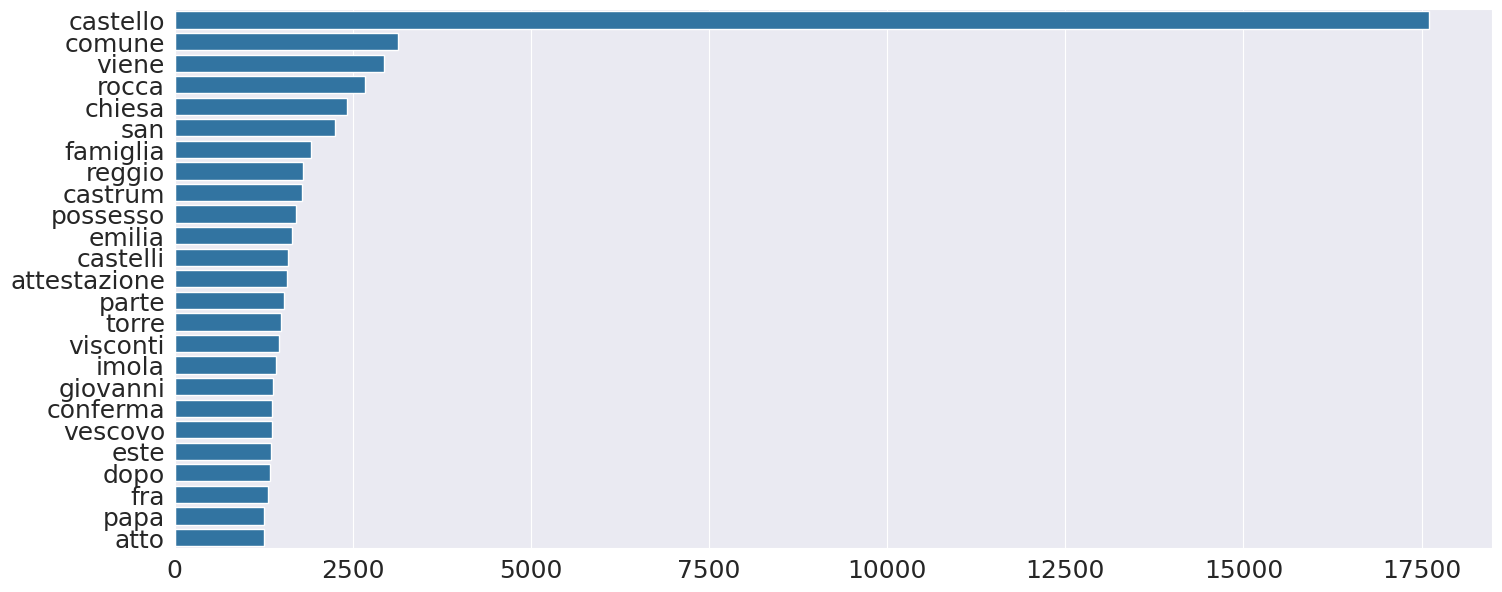

In [34]:
sns.barplot(y=words, x=counts)
plt.show()

Visualize the most common bigrams occurring across the events' descriptions:

In [35]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df_content['Avvenimento'])

In [36]:
count_values = bigrams.sum(axis=0)
ngram_freq = pd.DataFrame(
    sorted([(count_values[0, i], k) for k, i in cv.vocabulary_.items()], reverse=True)
)

ngram_freq.columns = ["frequency", "ngram"]

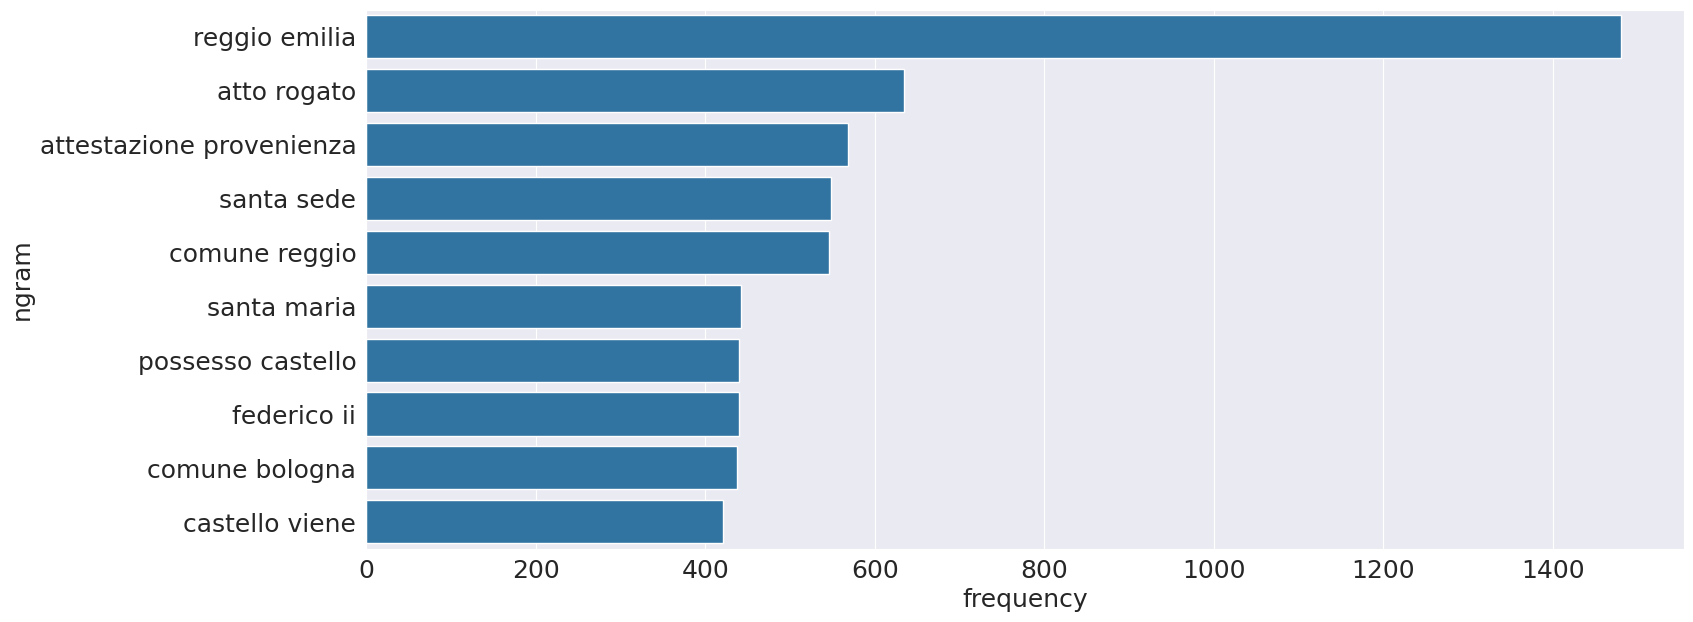

In [37]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.show()

Visualize the most common trigrams occurring across the events' descriptions:

In [38]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df_content['Avvenimento'])

In [39]:
count_values = trigrams.sum(axis=0)
count_values = count_values.A1
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

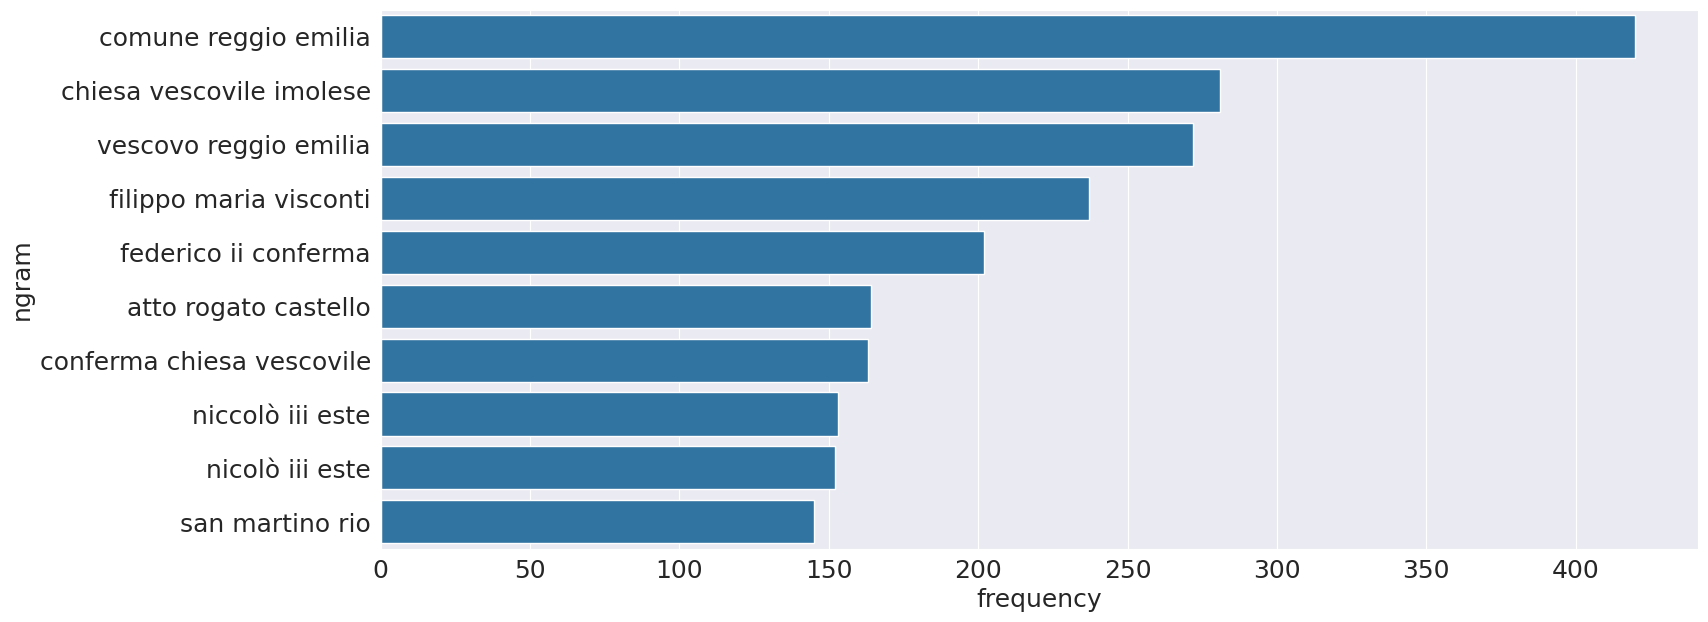

In [40]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.show()

### `VolumeRiferimento`

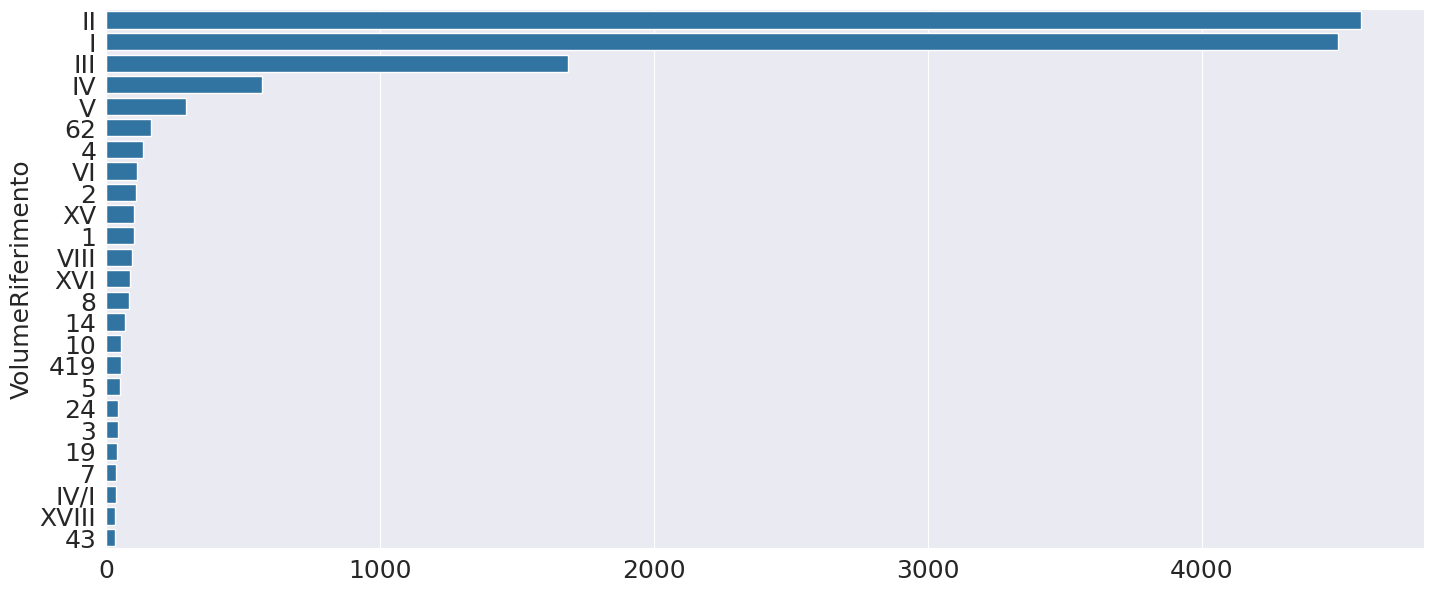

In [41]:
refvolume_counts = df['VolumeRiferimento'].value_counts().head(25)
sns.barplot(y=refvolume_counts.index, x=refvolume_counts.values)
plt.show()

### `PaginaRiferimento`

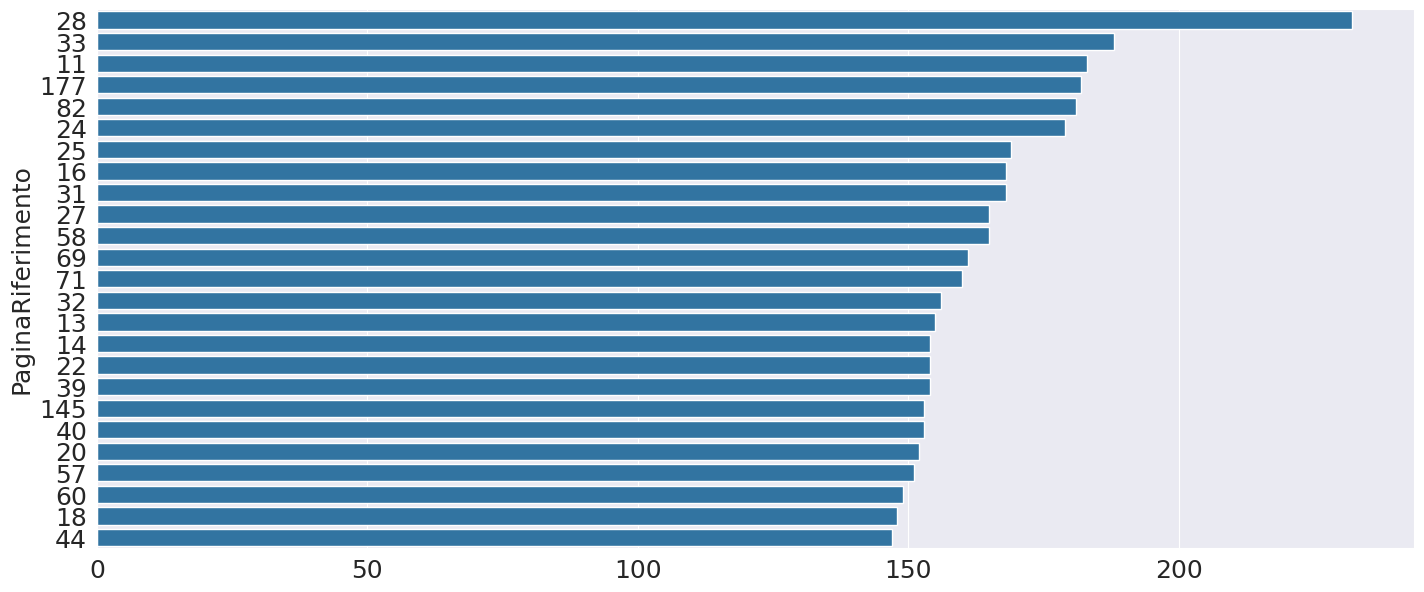

In [42]:
refpage_counts = df['PaginaRiferimento'].value_counts().head(25)
sns.barplot(y=refpage_counts.index, x=refpage_counts.values)
plt.show()

### `NumeroDocumento`

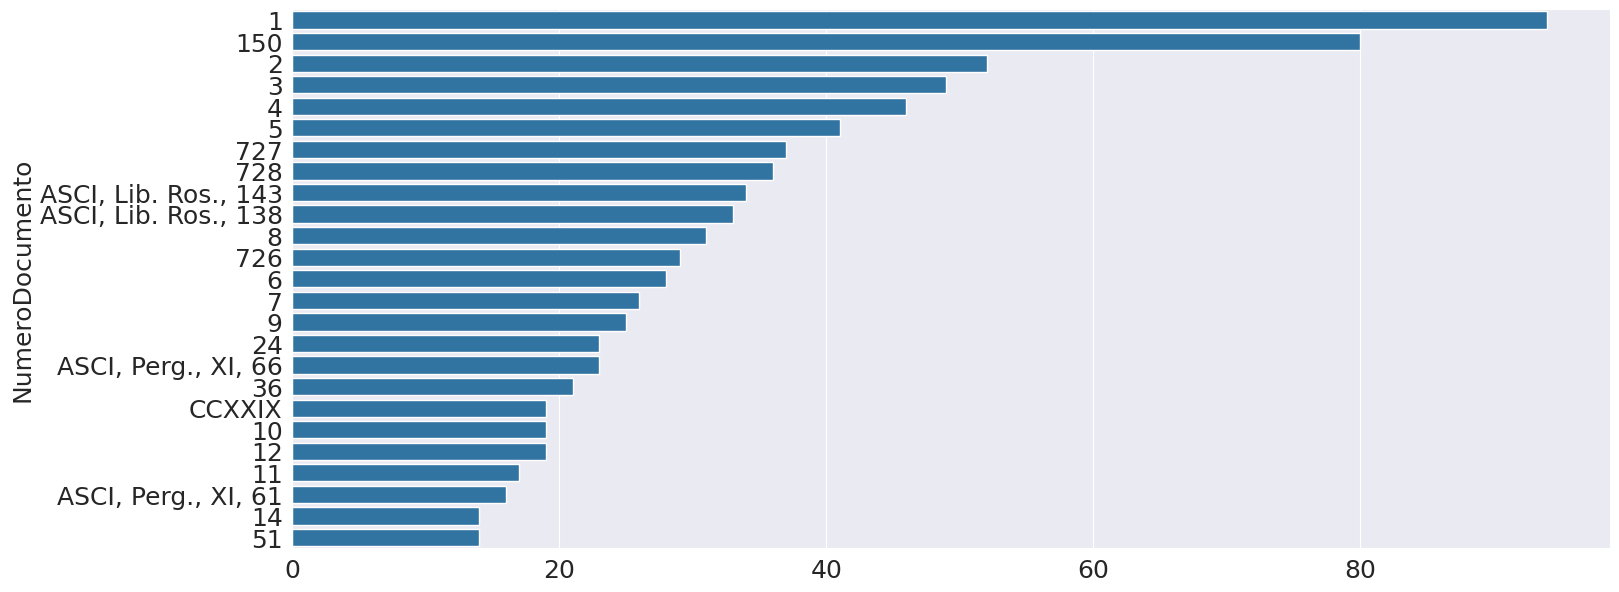

In [43]:
docnumber_counts = df['NumeroDocumento'].value_counts().head(25)
sns.barplot(y=docnumber_counts.index, x=docnumber_counts.values)
plt.show()

### `Denominazione`

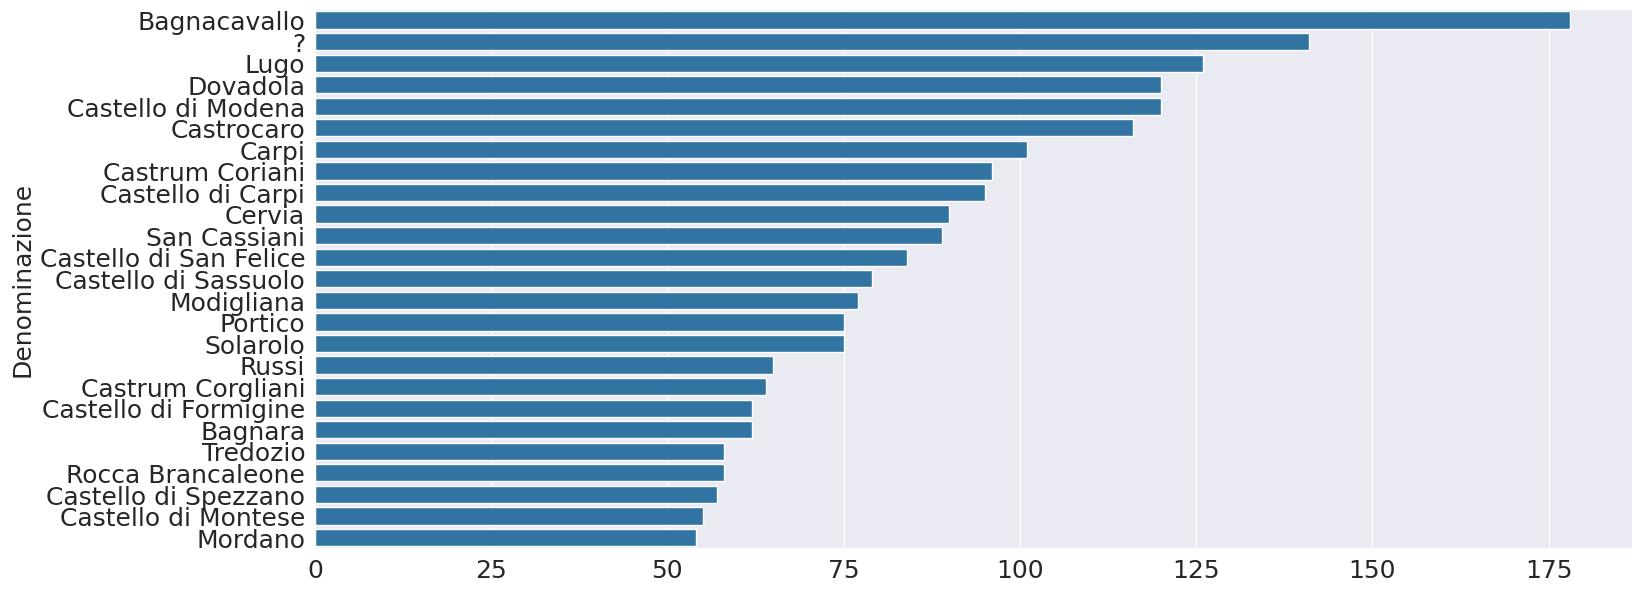

In [44]:
appellation_counts = df['Denominazione'].value_counts().head(25)
sns.barplot(y=appellation_counts.index, x=appellation_counts.values)
plt.show()

### `Appartenenza`

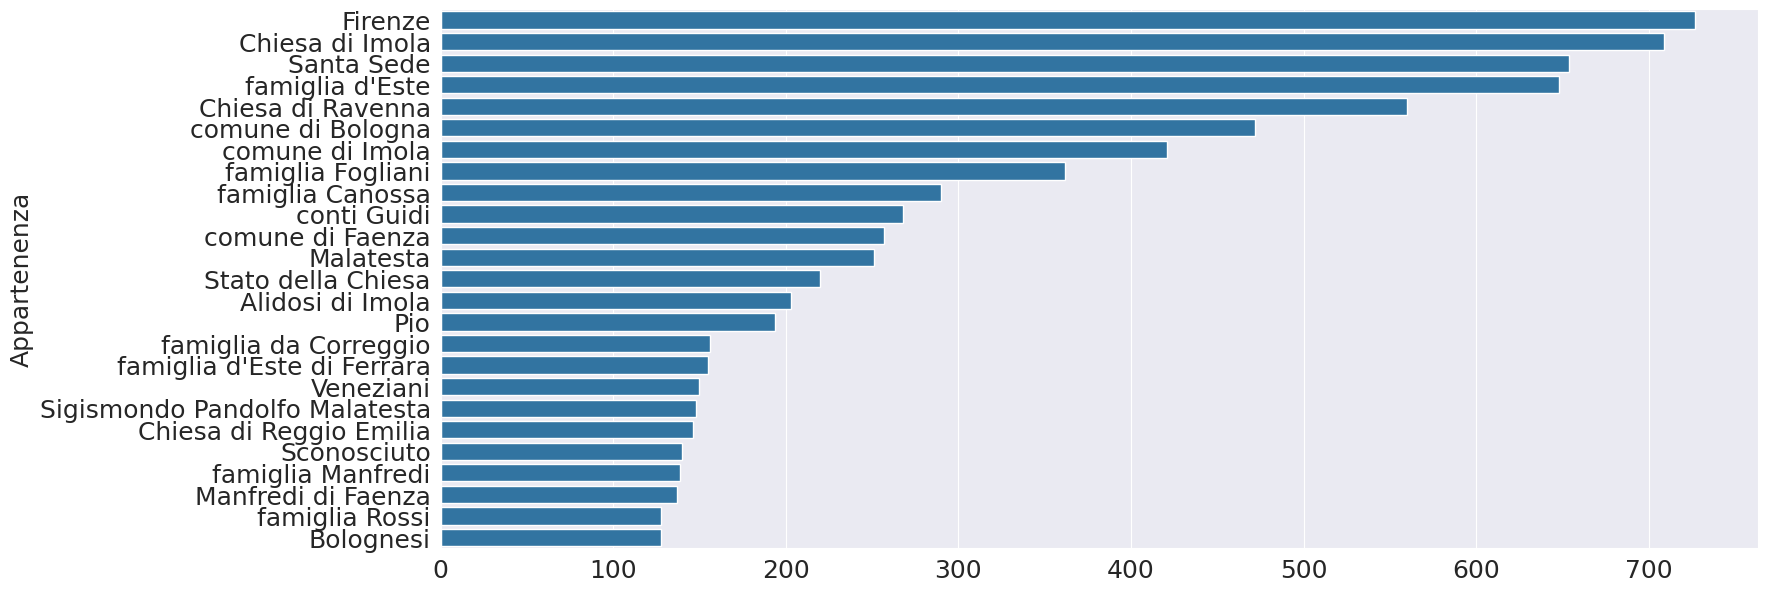

In [45]:
ownership_counts = df['Appartenenza'].value_counts().head(25)
sns.barplot(y=ownership_counts.index, x=ownership_counts.values)
plt.show()

### `TitoloPossesso`

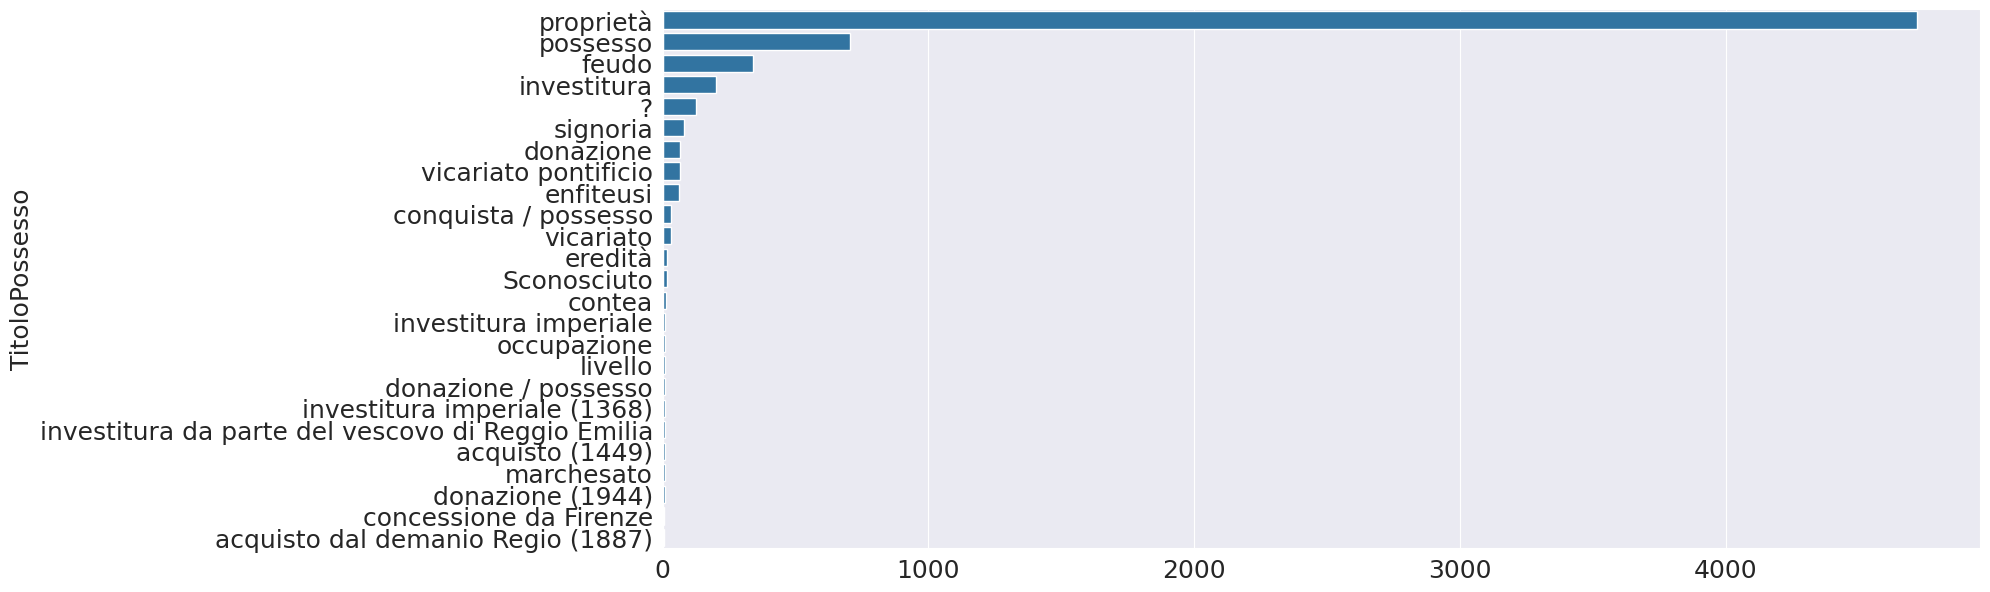

In [46]:
title_counts = df['TitoloPossesso'].value_counts().head(25)
sns.barplot(y=title_counts.index, x=title_counts.values)
plt.show()

### `StruttureIndicate`

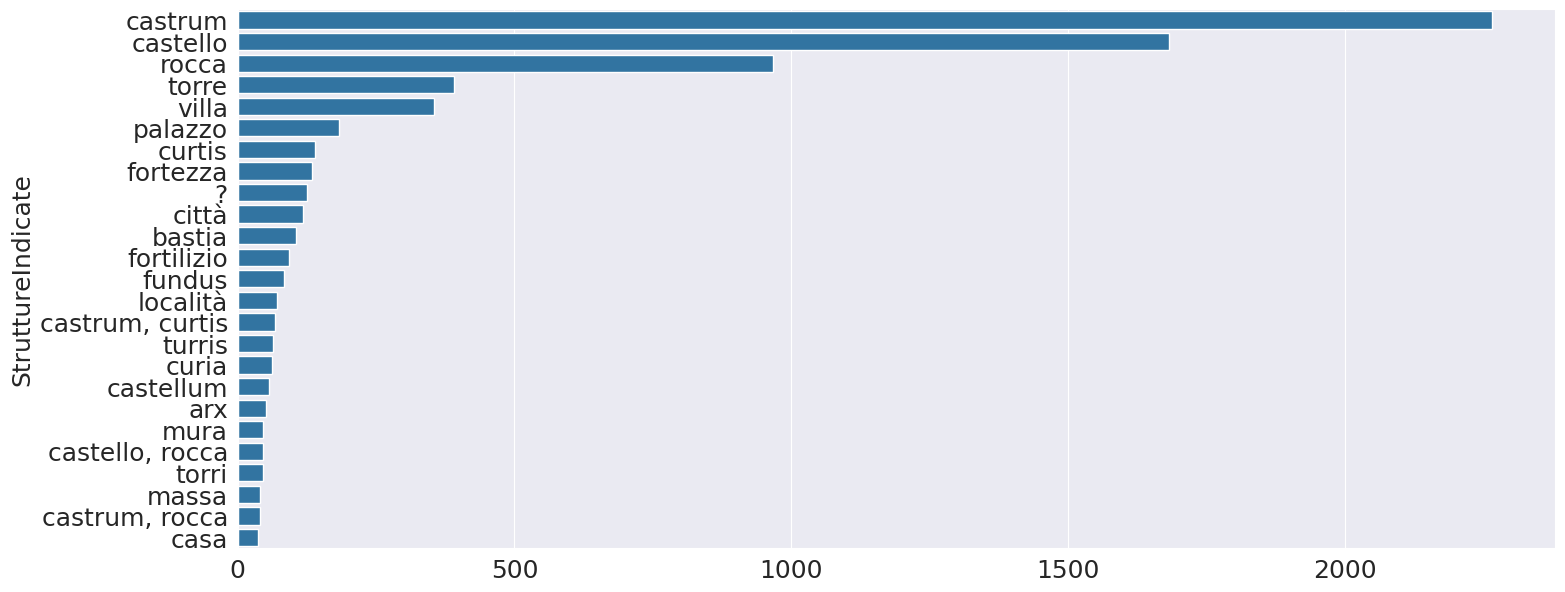

In [47]:
structures_counts = df['StruttureIndicate'].value_counts().head(25)
sns.barplot(y=structures_counts.index, x=structures_counts.values)
plt.show()

## Observations

* NULL values should be normalized
* There are some empty records (`Avvenimento` == '?')
* Should `IdVeteroDb`, `IdRifVeteroDb` and `IdBibliografiaProvv` be dropped?
* `Datazione` tends to be not normalized
* Normalization is also needed for `DataNA`, `DataNM` and `DataNG`
* `VolumeRiferimento` should be normalized (e.g. only integers)
* What is `NumeroDocumento`? (An identifier? Of what?)
* What is `Denominazione`?
* Should `Appartenenza` be normalized?
* Should `TitoloPossesso` be normalized?
* Should `StruttureIndicate` be normalized?
* Should `Pieve`, `Parrocchia` and `DistrettoCivile` be dropped?